# Assignment: Unsupervised Machine Learning \ Clustering

#### Submitted by: Noa Kotler, Nitzan Tal

In this assignment you will continue the experience you've done with clustering - this time, via hierarchical clustering and DBSCAN.

## Part 1: Hierarchical Clustering
(Practice material by Etam Benger)

In this part we are going to experiment with Hierarchical Clustering, a very powerfull clustering technique that can easily be interperted and explained via the dendrgoram.

The analyses are made on real datasets under the circumstances of real life challenges in unsupervised machine learning.

### Different ways to calculate the distance between clusters can yield strikingly different results

In [1]:
import numpy as np
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Labels
l = ['A', 'B', 'C', 'D', 'E', 'F']

# Distance matrix
# (Note that it must be symmetrical and its diagonal is always 0)
d = np.array([[0, 1, 3, 3, 3, 4],
              [1, 0, 4, 2, 3, 2],
              [3, 4, 0, 3, 2, 5],
              [3, 2, 3, 0, 2, 4],
              [3, 3, 2, 2, 0, 5],
              [4, 2, 5, 4, 5, 0]])

In [3]:
# The hierarchy.linkage function uses a condensed distance matrix,
# which is a flattened vector of the upper right triangle of the matrix:
# (Caution! If you use the distance matrix as is, you will get erroneous
# results -- in that case the algorithm will assume that each row is a
# vector that represents the respective point, and will calculate the
# euclidean distance between those vectors, which is absolute nonsense.)
squareform(d)

array([1, 3, 3, 3, 4, 4, 2, 3, 2, 3, 2, 5, 2, 4, 5])

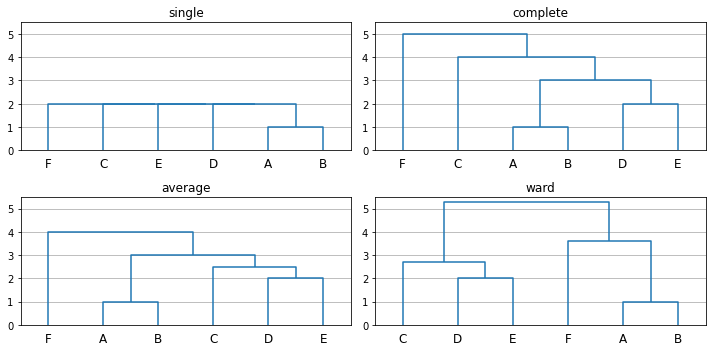

In [4]:
# Please read the documentation here:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
#
# As you'll see below, the different methods of linkage may produce very different structures
# and, consequently, very different clusters. Try to understand why (look at the distance matrix
# and follow the formulas in the documentation).
# Sometimes the characteristics of the problem suggest what method is more natural to use than
# the others. This is especially true with respect to the complete (= farthest point) and single
# (= nearest point) methods. Other times the 'correct' method to use is not obvious at all, and
# it requires inspecting the results and the data thoroughly. The average method usually works
# well, however.

methods = ['single', 'complete', 'average', 'ward']  # There are other methods as well, see documentation

plt.figure(figsize=(10, 5))

for i, method in enumerate(methods):
    plt.subplot(2, 2, i+1)
    plt.title(method)
    
    ############# This is the relevant part: #############
    #                                                    #
    lnk = hierarchy.linkage(squareform(d), method)
    hierarchy.dendrogram(lnk, labels=l, color_threshold=0)
    #                                                    #
    ######################################################
    
    plt.ylim(0, 5.5)
    plt.grid(axis='y')

plt.tight_layout()

### Altering the order in which clusters are joined can also yield strikingly different results

In [5]:
# Labels
l = ['A', 'B', 'C', 'D', 'E']

# Distance matrices
epsilon = 10**-16
a, b = 1 + epsilon, 1 - epsilon

d1 = np.array([[0, 1, a, 5, 5],
               [1, 0, 3, 5, 5],
               [a, 3, 0, 3, b],
               [5, 5, 3, 0, 1],
               [5, 5, b, 1, 0]])

d2 = np.array([[0, 1, b, 5, 5],
               [1, 0, 3, 5, 5],
               [b, 3, 0, 3, a],
               [5, 5, 3, 0, 1],
               [5, 5, a, 1, 0]])

In [6]:
# The Frobenius distance between the matrices is negligible
np.sqrt(np.sum((d1-d2)**2))

2.220446049250313e-16

In [7]:
d1

array([[0., 1., 1., 5., 5.],
       [1., 0., 3., 5., 5.],
       [1., 3., 0., 3., 1.],
       [5., 5., 3., 0., 1.],
       [5., 5., 1., 1., 0.]])

In [8]:
# But the resulting clusters are very different!

def cluster_and_plot_dendrogram(d1,d2,titles):
    plt.figure(figsize=(10, 3))

    for i, d in enumerate([d1, d2]):
        plt.subplot(1, 2, i+1)
        plt.title(titles[i])

        lnk = hierarchy.linkage(squareform(d), 'complete') # You can experiment with the different methods ('single', 'complete', 'average', 'ward')
        hierarchy.dendrogram(lnk, labels=l, color_threshold=0)

        plt.ylim(0, 6)
        plt.grid(axis='y')

    plt.tight_layout()

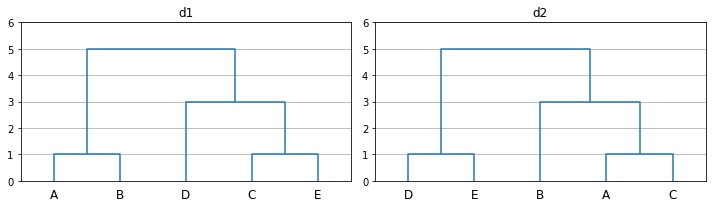

In [9]:
cluster_and_plot_dendrogram(d1,d2, ['d1', 'd2'])

## Challenge 1.1
Data preparation and preprocessing can help in reducing such "hypersensitivity". One of the techniques is to clean the distance matrix from noise before the actual clustering. This can be done by... clustering. Your tasks:
1. Apply the K-Means algorithm to clean the distance matrix, assuming the correct number of clusters is 4. Clustering can be applied on each matrix independently, although in some cases it's wiser to do a cross-matrix clustering.
2. Create new cleaned versions of the distance matrices (d1_clean and d2_clean).
3. Repeat the above process (previus cell) to plot the results

d1_clean = 
 [[0. 1. 1. 5. 5.]
 [1. 0. 3. 5. 5.]
 [1. 3. 0. 3. 1.]
 [5. 5. 3. 0. 1.]
 [5. 5. 1. 1. 0.]] 
 d2_clean = 
 [[0. 1. 1. 5. 5.]
 [1. 0. 3. 5. 5.]
 [1. 3. 0. 3. 1.]
 [5. 5. 3. 0. 1.]
 [5. 5. 1. 1. 0.]]


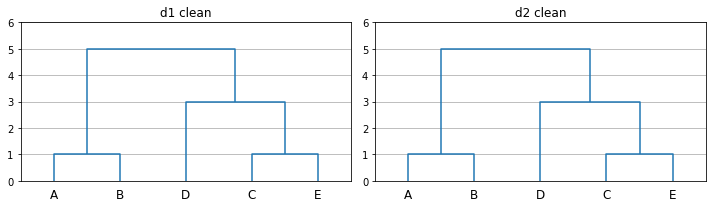

In [10]:
# Apply the K-Means algorithm to clean the distance matrix

from sklearn.cluster import KMeans

CLUSTERS = 4

d1_d2 = np.concatenate((d1,d2), axis=0)
dist_mat_as_vec = np.expand_dims(d1_d2.flatten(), axis = 1)

kmeans_classifier = KMeans(CLUSTERS).fit(dist_mat_as_vec)
cluster_assignments = kmeans_classifier.predict(dist_mat_as_vec)

# replace values in matrices with the cluster means
clean_values = [kmeans_classifier.cluster_centers_[i].item() for i in cluster_assignments]
d1_d2_clean = np.array(clean_values).reshape(d1_d2.shape)
d1_clean,d2_clean = np.split(d1_d2_clean, 2)

print('d1_clean = \n', d1_clean,'\n','d2_clean = \n', d2_clean)

cluster_and_plot_dendrogram(d1_clean, d2_clean, ['d1 clean', 'd2 clean'])

***
#### Now that we cleaned the noise the two matrices provide the same clustering results.
***

### Analyzing voting data

We can also use hierarchical clustering to analyzie election voting data, as we will see in the following exercise

We will use here data from the 18th Kneset elections. https://en.wikipedia.org/wiki/2009_Israeli_legislative_election


In [11]:
PARTIES_COUNT = 34   # 41 columns - metadata ones

def load_data():
    df = pd.read_csv('Elections.csv')
    
    print(df.shape)
    display(df.head(5))
    
    return df

def get_parties_names(df):
    return list(df.columns)[7:]

In [12]:
df = load_data()
party_names = get_parties_names(df)

(1156, 41)


,TownNumber,TownName,Potential,TotalVotes,PercentVote,Qualified,Disqualified,Avoda,Or,BaitYehudi,...,Brit,Gever,Zomet,Zabar,Daam,AleYarok,Koah.2,Lidar,Yarok,Shas
0,5000,תל אביב - יפו,383990,226390,58.96,224000,2390,34095,77,3417,...,36,41,42,273,198,1003,50,41,1081,14412
1,3000,ירושלים,353784,217905,61.59,215743,2162,12355,38,8944,...,26,19,23,147,64,434,26,39,445,32624
2,4000,חיפה,235198,136506,58.04,134710,1796,17279,43,3431,...,13,29,67,218,89,485,41,37,467,4117
3,8300,ראשון לציון,182953,117147,64.03,115839,1308,12647,25,2451,...,22,22,24,238,63,454,30,30,580,6784
4,7900,פתח תקווה,155678,100123,64.31,98905,1218,8661,20,6043,...,19,16,21,90,45,330,41,32,341,8061


#### Cluster Cities

In [13]:
# Number of cities to cluster (they are ordered by the total number of votes, descending)
n = 100

# Data matrix and labels list
x_cities = np.zeros((n, PARTIES_COUNT))
town_names_reversed = []  # town names

# Iterate over rows in dataframe
for i, row in df[:n].iterrows():
    x_cities[i] = row[7:]                             # take only the votes, not the other meta-data
    town_names_reversed.append(df.TownName[i][::-1])  # reverse the labels (because they are in Hebrew)


# Normalize rows (so they represent proportions of voters for each party (sum of probabilities in each row is 1)):
x_cities = x_cities /(np.sum(x_cities, axis=1).reshape(-1, 1))

# create dataframe
x_cities = pd.DataFrame(x_cities,columns=party_names)
x_cities.index = town_names_reversed

print('x now contains features which are the parties voting percentage for every city')
display(x_cities.head())

x now contains features which are the parties voting percentage for every city


,Avoda,Or,BaitYehudi,YahadutHatora,Balad,MeimadYarukim,Hadash,Gimlaim,EfraimSne,IhudLeumi,...,Brit,Gever,Zomet,Zabar,Daam,AleYarok,Koah.2,Lidar,Yarok,Shas
ופי - ביבא לת,0.152210,0.000344,0.015254,0.010022,0.003004,0.013625,0.023228,0.008112,0.002040,0.012281,...,0.000161,0.000183,0.000188,0.001219,0.000884,0.004478,0.000223,0.000183,0.004826,0.064339
םילשורי,0.057267,0.000176,0.041457,0.189707,0.002457,0.020946,0.006814,0.004366,0.001052,0.066097,...,0.000121,0.000088,0.000107,0.000681,0.000297,0.002012,0.000121,0.000181,0.002063,0.151217
הפיח,0.128268,0.000319,0.025470,0.022715,0.020570,0.007787,0.041073,0.011298,0.002375,0.016072,...,0.000097,0.000215,0.000497,0.001618,0.000661,0.003600,0.000304,0.000275,0.003467,0.030562
ןויצל ןושאר,0.109177,0.000216,0.021159,0.005490,0.000233,0.004273,0.001191,0.006371,0.002279,0.014235,...,0.000190,0.000190,0.000207,0.002055,0.000544,0.003919,0.000259,0.000259,0.005007,0.058564
הווקת חתפ,0.087569,0.000202,0.061099,0.034356,0.000243,0.004166,0.001062,0.007563,0.002427,0.041595,...,0.000192,0.000162,0.000212,0.000910,0.000455,0.003337,0.000415,0.000324,0.003448,0.081502


In [14]:
# You can experiment with the different methods ('single', 'complete', 'average', 'ward'):
# (Note that we don't use squareform here, so the linkage function will assume by
# default that x is not a distance matrix but a set of observations, and will calculate
# the euclidean distance between them. We could, instead, calculate our own distance
# matrix using other distance measures between distributions, for example the Kullback-
# Leibler divergence (relative entropy).)

#lnk = hierarchy.linkage(x_cities, 'average')

In [15]:
def cluster_and_plot_dendrogram_custom(x, c_threshold = 0.5, method = 'all', metric = 'euclidean', title = ''):
    ''' Run hierarichal clustering based on the given paramters and plot a dendogram'''

    if method == 'all':  
        
        # Run clustering using all methods
        methods = ['single', 'complete', 'average', 'ward'] 
        fig = plt.figure(figsize=(18, 25));

        for i, method_ in enumerate(methods):    
            
            fig.add_subplot(4, 1, i+1)
            plt.title(method_  + ' , ' + metric + '; ' + title);
            plt.grid(axis='y')

            if method == 'ward': 
                lnk = hierarchy.linkage(x, method_, metric = 'euclidean') # ward only works with euclidean
            
            else:
                lnk = hierarchy.linkage(x, method_, metric = metric)
                hierarchy.dendrogram(lnk, labels=x.index, leaf_font_size=10, color_threshold=c_threshold)

    
    else:
        fig = plt.figure(figsize=(20, 6));
        plt.title(method  + ' , ' + metric + title);
        plt.grid(axis='y')
        lnk = hierarchy.linkage(x, method)
        hierarchy.dendrogram(lnk, labels=x.index, leaf_font_size=12, color_threshold=0.5)


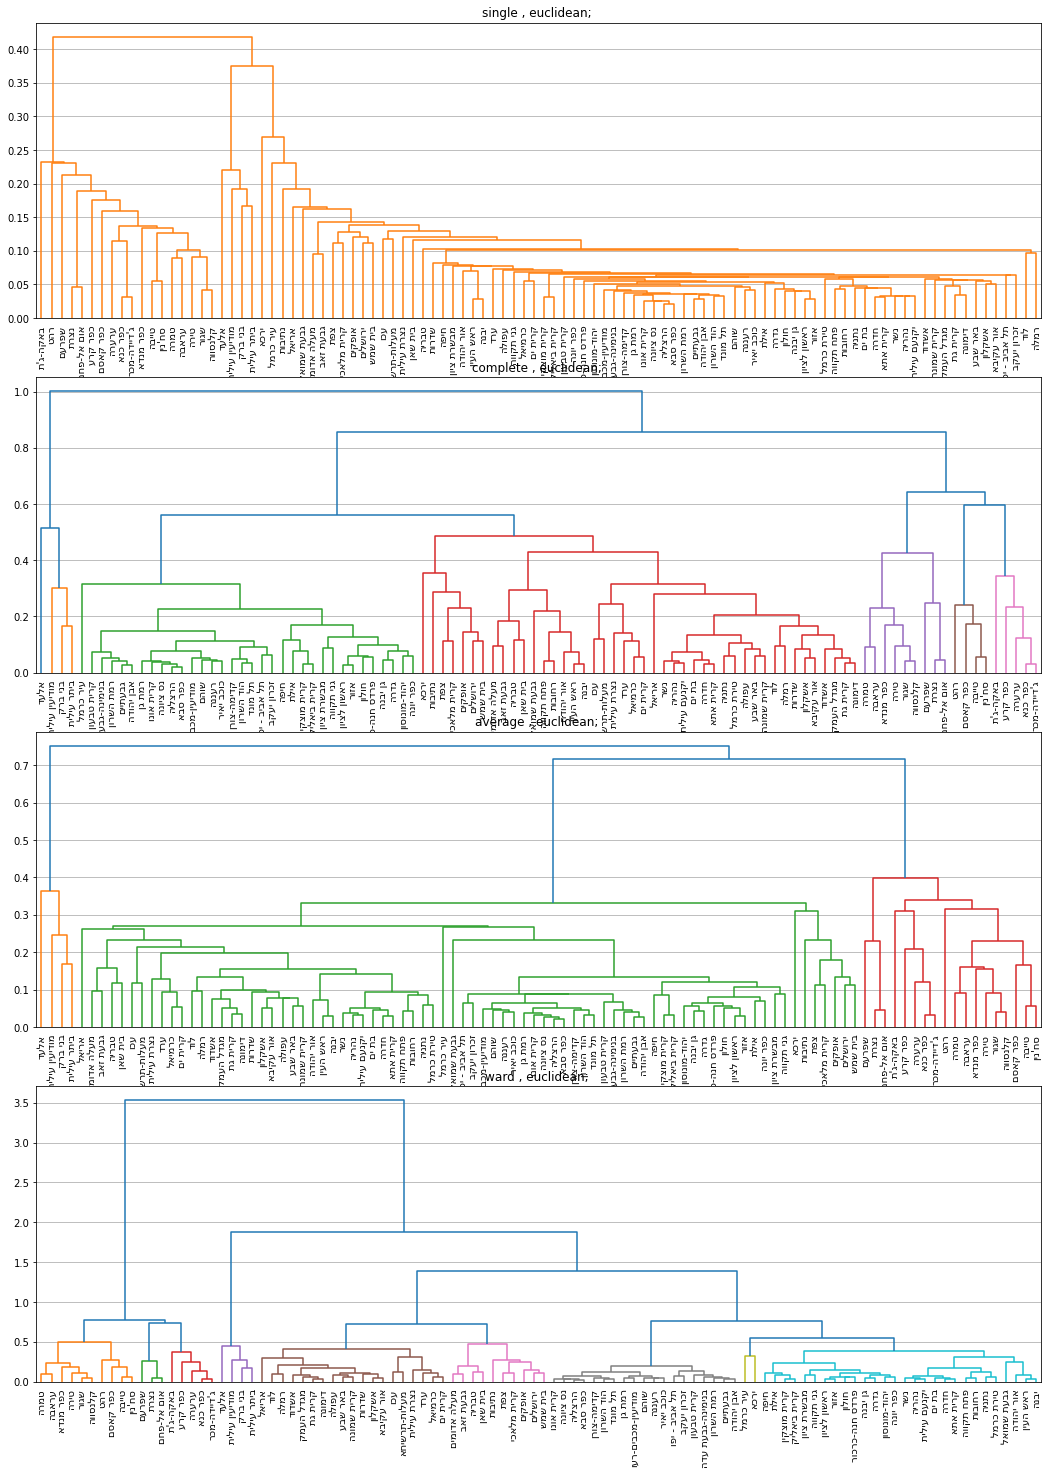

In [16]:
cluster_and_plot_dendrogram_custom(x_cities, method = 'all')

***
In the `Single` method- we can see that for two clusters, we get Arabic cities chained together into onr cluster to the left, and all others on the right cluster, which is split into a cluster of orthodox cities on the left, and all others on the right.  We can also see very clearly the chaining effect in this method.

For `Complete` method - we get a course clustering to orthodox vs. the rest, and in the rest, we get jewish cities vs Arabic cities, and within the jewish cities we get a separation to two major groups (more 'right' and more 'left'). This seems like an overall correct clustering of the cities.

The `Average` linkage also produces nice results: on the right - we have a cluster of Arabic cities, on the left we have the most orthodox cities, and all the rest are one cluster in the middle. So it's a pretty coarse sepration of the cities, which matches the algorithm tendancy to identify global patterns.

When using the `Ward` method, we got a results similar to the average method but with smaller more distinguished clusters 
***

## Challenge 1.2
When using our domain expertise regarding the population in Israeli cities and villages, we can cleary conclude from the results that our society is mainly splitted according to their "religiosity". Although the jingle says "there's no more right or left", your mission, should you choose to accept it, is to find a way to distinguish between right and left.

The guiding line:
1. We want to cluster parties (for example, left or right winged). Adjust the matrix accordingly.
2. You can change the max number of cities (100 is set now) or the normalization technique.
3. We do not expect to have exact coalition proposed by this technique, however, explain (in a text cell) the gaps between your results and the real agenda proposed by the parties. What exactly could have caused this gaps?

#### Cluster Parties

In [17]:
display(df)

,TownNumber,TownName,Potential,TotalVotes,PercentVote,Qualified,Disqualified,Avoda,Or,BaitYehudi,...,Brit,Gever,Zomet,Zabar,Daam,AleYarok,Koah.2,Lidar,Yarok,Shas
0,5000,תל אביב - יפו,383990,226390,58.96,224000,2390,34095,77,3417,...,36,41,42,273,198,1003,50,41,1081,14412
1,3000,ירושלים,353784,217905,61.59,215743,2162,12355,38,8944,...,26,19,23,147,64,434,26,39,445,32624
2,4000,חיפה,235198,136506,58.04,134710,1796,17279,43,3431,...,13,29,67,218,89,485,41,37,467,4117
3,8300,ראשון לציון,182953,117147,64.03,115839,1308,12647,25,2451,...,22,22,24,238,63,454,30,30,580,6784
4,7900,פתח תקווה,155678,100123,64.31,98905,1218,8661,20,6043,...,19,16,21,90,45,330,41,32,341,8061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,868,אלוני יצחק,116,22,18.97,22,0,7,0,1,...,0,0,0,0,0,0,0,0,0,0
1152,338,איבים,136,18,13.24,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1153,969,עטאוונה (שבט),109,8,7.34,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1154,921,שער מנשה,137,5,3.65,4,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1


***
We need to cluster the parties, so let's transpose the matrix so our rows will be the parties 
and the features will be the voting counts - let's extract the data from the DF into a new data matrix
***


In [18]:
# create a dataframe for matrix with rows as parties and columns as cities (features)

x_parties = np.zeros((df.shape[0], PARTIES_COUNT))

town_names = []

for i, row in df.iterrows():
    x_parties[i] = row[7:]        # take only the votes, not the other meta-data
    town_names.append(df.TownName[i][::-1])

x_parties = x_parties.T     # Transpose the matrix

# convert to DataFrame
x_parties = pd.DataFrame(x_parties,columns=town_names)
x_parties.index = get_parties_names(df) 

display(x_parties.head())

,ופי - ביבא לת,םילשורי,הפיח,ןויצל ןושאר,הווקת חתפ,דודשא,ןולוח,הינתנ,עבש ראב,ןג תמר,...,)טבש( ןיעאווק,תונייע,)טבש( דסא,יתדה רעונה רפכ,םולש םרכ,קחצי ינולא,םיביא,)טבש( הנוואטע,השנמ רעש,תובא הוונ
Avoda,34095.0,12355.0,17279.0,12647.0,8661.0,4176.0,9439.0,5928.0,5577.0,11023.0,...,1.0,5.0,1.0,0.0,3.0,7.0,0.0,0.0,1.0,1.0
Or,77.0,38.0,43.0,25.0,20.0,23.0,22.0,33.0,19.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BaitYehudi,3417.0,8944.0,3431.0,2451.0,6043.0,1399.0,1409.0,3462.0,1608.0,2185.0,...,0.0,0.0,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0
YahadutHatora,2245.0,40928.0,3060.0,636.0,3398.0,8101.0,450.0,1849.0,533.0,531.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Balad,673.0,530.0,2771.0,27.0,24.0,43.0,18.0,33.0,88.0,12.0,...,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### sort parties by vote counts

In [19]:
# Sort parties by total count of votes (temporarily add another column for total votes)

x_parties.loc[:,'Party_Total_votes'] = x_parties.sum(numeric_only=True, axis=1)
x_parties = x_parties.sort_values(by='Party_Total_votes', ascending=False)
x_parties.drop(['Party_Total_votes'], axis=1, inplace=True)
display(x_parties.head(5))

,ופי - ביבא לת,םילשורי,הפיח,ןויצל ןושאר,הווקת חתפ,דודשא,ןולוח,הינתנ,עבש ראב,ןג תמר,...,)טבש( ןיעאווק,תונייע,)טבש( דסא,יתדה רעונה רפכ,םולש םרכ,קחצי ינולא,םיביא,)טבש( הנוואטע,השנמ רעש,תובא הוונ
Kadima,75785.0,24803.0,38196.0,37663.0,23405.0,14896.0,26004.0,18579.0,15257.0,25590.0,...,0.0,10.0,0.0,0.0,9.0,6.0,4.0,0.0,1.0,1.0
Likud,43318.0,51018.0,26693.0,31524.0,25884.0,23191.0,24253.0,23129.0,21657.0,18441.0,...,1.0,5.0,0.0,4.0,2.0,5.0,13.0,1.0,0.0,0.0
IsraelBeytenu,13644.0,13694.0,21948.0,16779.0,14836.0,24693.0,10815.0,13299.0,19447.0,5270.0,...,0.0,5.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0
Avoda,34095.0,12355.0,17279.0,12647.0,8661.0,4176.0,9439.0,5928.0,5577.0,11023.0,...,1.0,5.0,1.0,0.0,3.0,7.0,0.0,0.0,1.0,1.0
Shas,14412.0,32624.0,4117.0,6784.0,8061.0,14065.0,9250.0,8837.0,8491.0,3709.0,...,1.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0


### Let's normalize the dataset

In [20]:
# normalize by party
x_parties_full = x_parties.div(np.sum(x_parties, axis = 1), axis=0)

In [21]:
# let's check for Nan
display(x_parties_full[x_parties_full.isna().any(axis=1)])


,ופי - ביבא לת,םילשורי,הפיח,ןויצל ןושאר,הווקת חתפ,דודשא,ןולוח,הינתנ,עבש ראב,ןג תמר,...,)טבש( ןיעאווק,תונייע,)טבש( דסא,יתדה רעונה רפכ,םולש םרכ,קחצי ינולא,םיביא,)טבש( הנוואטע,השנמ רעש,תובא הוונ
Koah.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***

One party ('Koah.1') seems to not have any data. Let's remove it.

***

In [22]:
# Remove the rows with NaN
x_parties_full = x_parties_full.dropna(axis = 0)
x_parties_full.head()

,ופי - ביבא לת,םילשורי,הפיח,ןויצל ןושאר,הווקת חתפ,דודשא,ןולוח,הינתנ,עבש ראב,ןג תמר,...,)טבש( ןיעאווק,תונייע,)טבש( דסא,יתדה רעונה רפכ,םולש םרכ,קחצי ינולא,םיביא,)טבש( הנוואטע,השנמ רעש,תובא הוונ
Kadima,0.105399,0.034495,0.053122,0.052380,0.032551,0.020717,0.036165,0.025839,0.021219,0.035590,...,0.000000,0.000014,0.000000,0.000000,0.000013,0.000008,0.000006,0.000000,0.000001,0.000001
Likud,0.063456,0.074735,0.039102,0.046179,0.037917,0.033972,0.035528,0.033881,0.031725,0.027014,...,0.000001,0.000007,0.000000,0.000006,0.000003,0.000007,0.000019,0.000001,0.000000,0.000000
IsraelBeytenu,0.036870,0.037006,0.059310,0.045342,0.040092,0.066728,0.029226,0.035938,0.052552,0.014241,...,0.000000,0.000014,0.000000,0.000000,0.000016,0.000003,0.000000,0.000000,0.000000,0.000000
Avoda,0.108517,0.039323,0.054995,0.040253,0.027566,0.013291,0.030042,0.018868,0.017750,0.035084,...,0.000003,0.000016,0.000003,0.000000,0.000010,0.000022,0.000000,0.000000,0.000003,0.000003
Shas,0.052885,0.119715,0.015107,0.024894,0.029580,0.051612,0.033943,0.032428,0.031158,0.013610,...,0.000004,0.000000,0.000000,0.000007,0.000000,0.000000,0.000004,0.000004,0.000004,0.000000


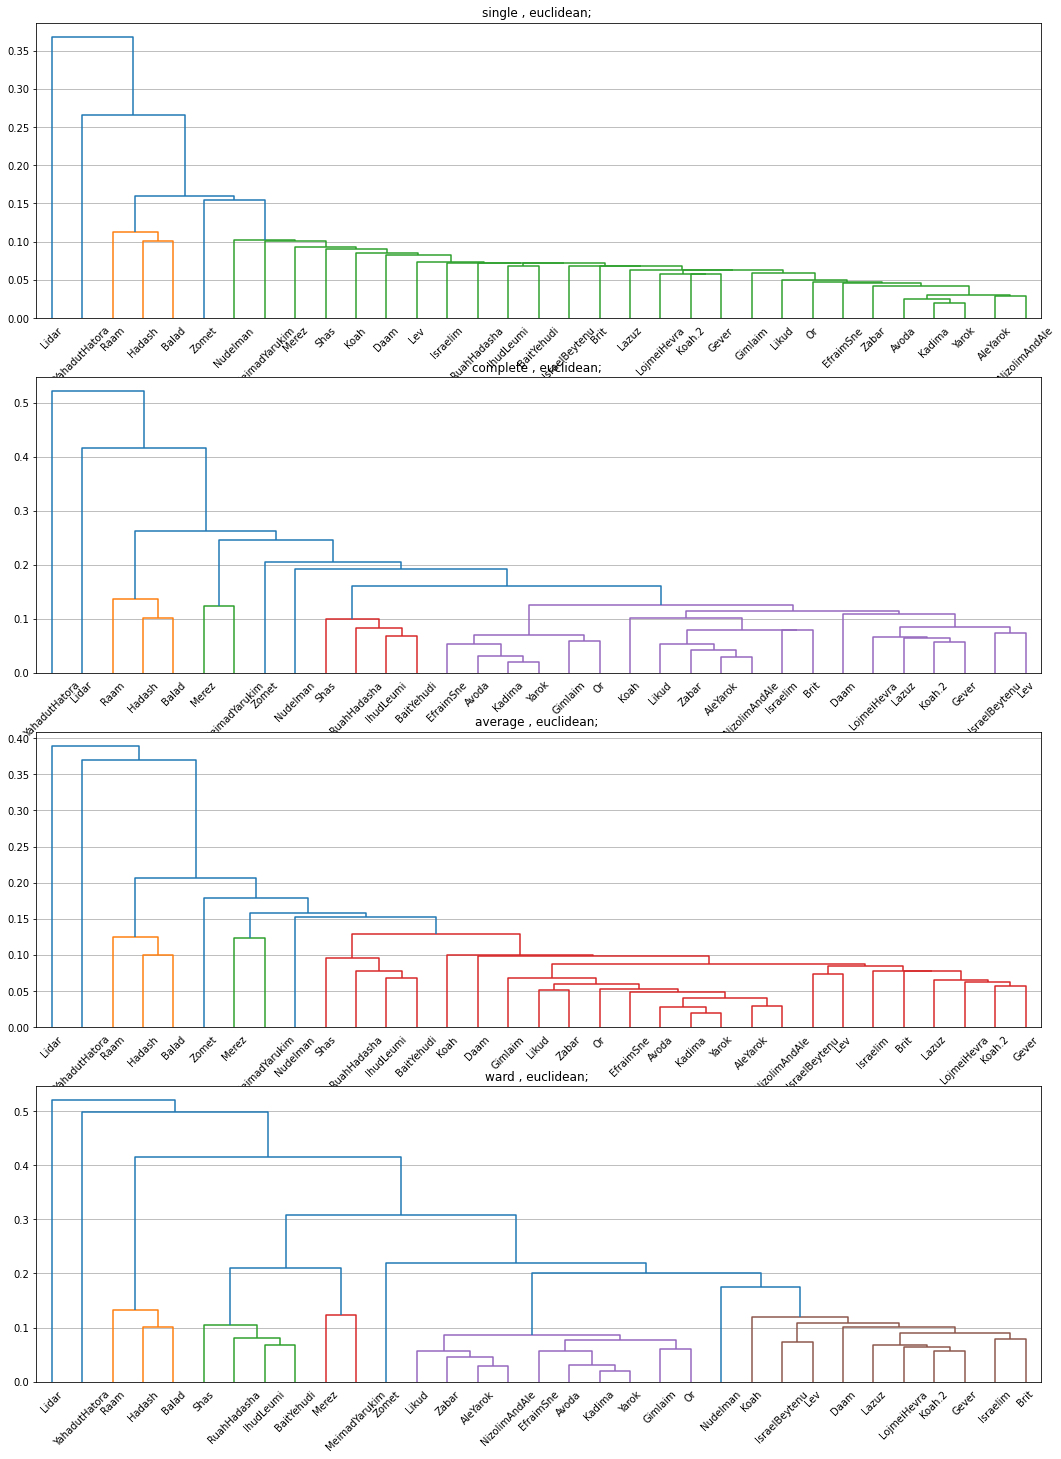

In [23]:
cluster_and_plot_dendrogram_custom(x_parties_full, c_threshold=0.15,  method = 'all') 

***


We don't see any clear patterns of Right and Left in these clustering results. Seems like similar parties are mostly clustered together (orthodox parties, Arabic parties), but the data feels noisy. Let's try to improve it.

***

### Let's try to make the model a little simpler with less parties

***
Let's look at total votes counts per party as there seems to be many very small parties which add a lot of noise, and don't really represent the political map.
***

,ופי - ביבא לת,םילשורי,הפיח,ןויצל ןושאר,הווקת חתפ,דודשא,ןולוח,הינתנ,עבש ראב,ןג תמר,...,)טבש( דסא,יתדה רעונה רפכ,םולש םרכ,קחצי ינולא,םיביא,)טבש( הנוואטע,השנמ רעש,תובא הוונ,Party_Total_votes,Party_Total_votes_perc
Kadima,75785.0,24803.0,38196.0,37663.0,23405.0,14896.0,26004.0,18579.0,15257.0,25590.0,...,0.0,0.0,9.0,6.0,4.0,0.0,1.0,1.0,719029.0,0.225465
Likud,43318.0,51018.0,26693.0,31524.0,25884.0,23191.0,24253.0,23129.0,21657.0,18441.0,...,0.0,4.0,2.0,5.0,13.0,1.0,0.0,0.0,682649.0,0.214057
IsraelBeytenu,13644.0,13694.0,21948.0,16779.0,14836.0,24693.0,10815.0,13299.0,19447.0,5270.0,...,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,370053.0,0.116037
Avoda,34095.0,12355.0,17279.0,12647.0,8661.0,4176.0,9439.0,5928.0,5577.0,11023.0,...,1.0,0.0,3.0,7.0,0.0,0.0,1.0,1.0,314191.0,0.098520
Shas,14412.0,32624.0,4117.0,6784.0,8061.0,14065.0,9250.0,8837.0,8491.0,3709.0,...,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,272514.0,0.085452


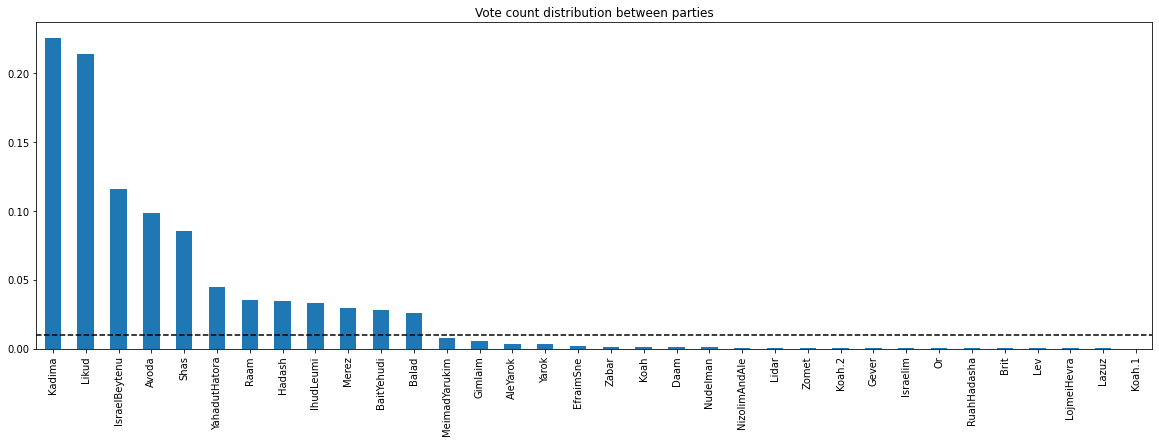

In [24]:
# add counts and % for each party

x_parties.loc[:,'Party_Total_votes'] = x_parties.sum(numeric_only=True, axis=1)
total_votes = x_parties.loc[:,'Party_Total_votes'].sum(axis = 0)
x_parties.loc[:,'Party_Total_votes_perc'] = x_parties.loc[:,'Party_Total_votes'] / total_votes

display(x_parties.head())

# plot the counts with a threshold of 1%

fig = plt.figure(figsize=(20, 6))
votes_perc = x_parties.loc[:,'Party_Total_votes_perc']
votes_perc.sort_values(ascending=False).plot.bar()
plt.title('Vote count distribution between parties')

# horizontal line indicating the threshold
plt.plot([-1,60], [0.01, 0.01], "k--")

***

Let's remove all parties under the 1% of the votes (as the really small parties are adding noise and not representative of the political map)

***

In [25]:
perc_threshold = 0.01

x_parties_clean = x_parties.loc[x_parties.Party_Total_votes_perc > perc_threshold] 
print(x_parties_clean.shape)
display(x_parties_clean.head())

(12, 1158)


,ופי - ביבא לת,םילשורי,הפיח,ןויצל ןושאר,הווקת חתפ,דודשא,ןולוח,הינתנ,עבש ראב,ןג תמר,...,)טבש( דסא,יתדה רעונה רפכ,םולש םרכ,קחצי ינולא,םיביא,)טבש( הנוואטע,השנמ רעש,תובא הוונ,Party_Total_votes,Party_Total_votes_perc
Kadima,75785.0,24803.0,38196.0,37663.0,23405.0,14896.0,26004.0,18579.0,15257.0,25590.0,...,0.0,0.0,9.0,6.0,4.0,0.0,1.0,1.0,719029.0,0.225465
Likud,43318.0,51018.0,26693.0,31524.0,25884.0,23191.0,24253.0,23129.0,21657.0,18441.0,...,0.0,4.0,2.0,5.0,13.0,1.0,0.0,0.0,682649.0,0.214057
IsraelBeytenu,13644.0,13694.0,21948.0,16779.0,14836.0,24693.0,10815.0,13299.0,19447.0,5270.0,...,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,370053.0,0.116037
Avoda,34095.0,12355.0,17279.0,12647.0,8661.0,4176.0,9439.0,5928.0,5577.0,11023.0,...,1.0,0.0,3.0,7.0,0.0,0.0,1.0,1.0,314191.0,0.098520
Shas,14412.0,32624.0,4117.0,6784.0,8061.0,14065.0,9250.0,8837.0,8491.0,3709.0,...,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,272514.0,0.085452


we get 12 parties that have a vote count percentage of 1%.

***

__Let's normalize the data__

now let's normalize the counts in the matrix to be a percentage of each party's votes

***

In [26]:
total_votes = x_parties_clean.Party_Total_votes

# clean the dataframe
x_parties_clean.drop(['Party_Total_votes', 'Party_Total_votes_perc'], axis=1, inplace=True)

x_parties_clean = x_parties_clean.div(total_votes, axis=0)
display(x_parties_clean.head())

/Users/noa/Documents/Y-Data/Fall 2/Unsupervised learning/venv/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ופי - ביבא לת,םילשורי,הפיח,ןויצל ןושאר,הווקת חתפ,דודשא,ןולוח,הינתנ,עבש ראב,ןג תמר,...,)טבש( ןיעאווק,תונייע,)טבש( דסא,יתדה רעונה רפכ,םולש םרכ,קחצי ינולא,םיביא,)טבש( הנוואטע,השנמ רעש,תובא הוונ
Kadima,0.105399,0.034495,0.053122,0.052380,0.032551,0.020717,0.036165,0.025839,0.021219,0.035590,...,0.000000,0.000014,0.000000,0.000000,0.000013,0.000008,0.000006,0.000000,0.000001,0.000001
Likud,0.063456,0.074735,0.039102,0.046179,0.037917,0.033972,0.035528,0.033881,0.031725,0.027014,...,0.000001,0.000007,0.000000,0.000006,0.000003,0.000007,0.000019,0.000001,0.000000,0.000000
IsraelBeytenu,0.036870,0.037006,0.059310,0.045342,0.040092,0.066728,0.029226,0.035938,0.052552,0.014241,...,0.000000,0.000014,0.000000,0.000000,0.000016,0.000003,0.000000,0.000000,0.000000,0.000000
Avoda,0.108517,0.039323,0.054995,0.040253,0.027566,0.013291,0.030042,0.018868,0.017750,0.035084,...,0.000003,0.000016,0.000003,0.000000,0.000010,0.000022,0.000000,0.000000,0.000003,0.000003
Shas,0.052885,0.119715,0.015107,0.024894,0.029580,0.051612,0.033943,0.032428,0.031158,0.013610,...,0.000004,0.000000,0.000000,0.000007,0.000000,0.000000,0.000004,0.000004,0.000004,0.000000


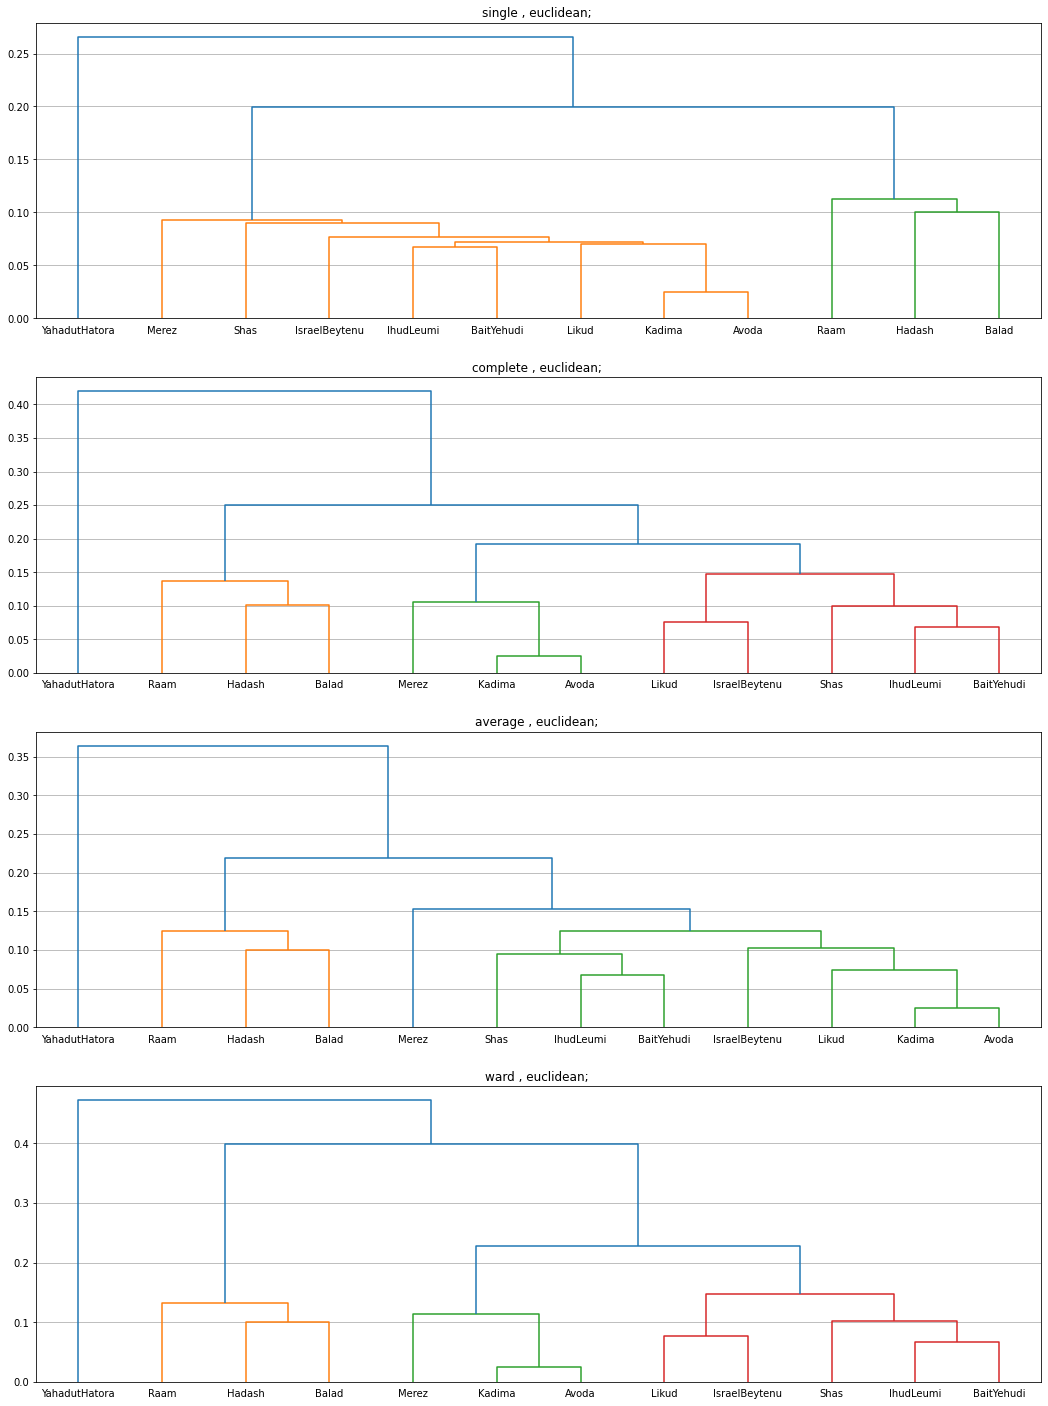

In [27]:
cluster_and_plot_dendrogram_custom(x_parties_clean, c_threshold= 0.15, method = 'all') 

### explain (in a text cell) the gaps between your results and the real agenda proposed by the parties. What exactly could have caused this gaps?

***

Seems like `ward` and `complete` linkage mothods work best and produce similar results: If we exclude Yahadut Hatorah, which is its own cluster, we got two clusters: 
 - left is Arabic (Raam, Balad, Hadash) 
 - Right (jewish) is a combination of two clusters: 
     - left is 'center / left': Merez, Avoda, Kadima,
     - right one is the more 'right' parties: 
         - Likud and Israel Beytenu (on the left) 
         - Shas, Bait Yehudi and Ihud Leumi (on the right). 
         
This describes the political map pretty well in terms of 'clusters' of similar parties.

So the gap here is Yahadut Hatorah, which we would expect it would be clustered with the the rightmost orthodox parties (Shas, Bait Yehudi and Ihud Leumi) but is not, and is on its own cluster that is clustered last with all the others.

So the gap might happen because we are using hierarchical clustering, which assumes hierarchical structure on the data, which is not the case here. Also, we assume that similar cities will vote for similar parties, which is also not necessarily the case - let's try to see if there is similarity between voting patterns for Yahadut Hatorah and the other orthodox parties:

***

In [28]:
parties = x_parties_clean.index.values

def plot_cities_voting(party, cities):
    plt.title(party)
    plt.xticks(rotation=90)
    plt.ylim([0,0.3])
    x_parties_clean.loc[party][cities].plot.bar()

    
def num_of_cities_for_percentage(party, num_cities):
    party_stats = x_parties_clean.loc[party]
    party_stats_sorted = party_stats.sort_values(ascending = False)[:num_cities]
    cummulative_votes = np.cumsum(party_stats_sorted)
    
#     print(f'{party}: {num_cities} cities account for {cummulative_votes[num_cities-1] * 100:.3f}% of the votes')
    
    return cummulative_votes[num_cities-1]

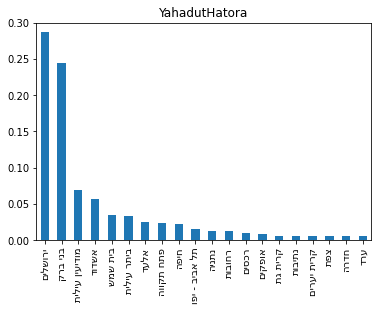

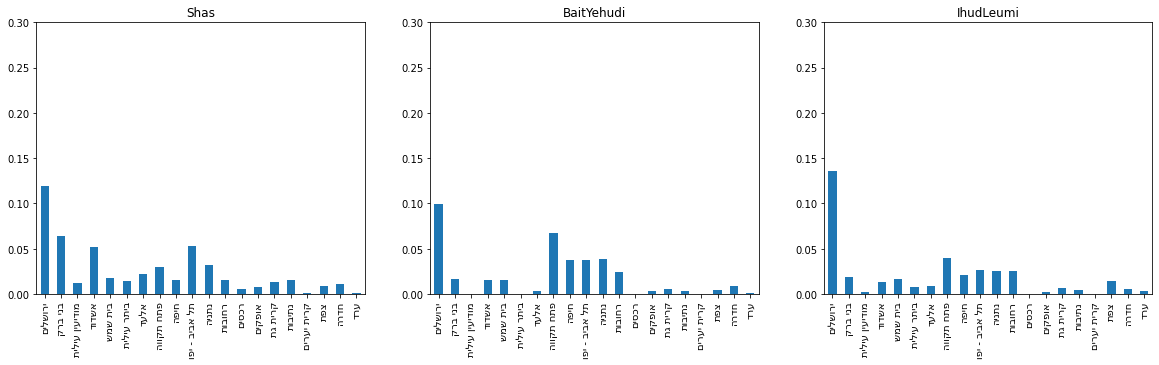

In [29]:
# Let's look at Yahadut Hatora and its top cities and compare it to other similar parties

YH = x_parties_clean.loc['YahadutHatora']
YH_sorted = YH.sort_values(ascending = False)[:20]
cities = YH_sorted.index
plot_cities_voting('YahadutHatora', cities)

fig = plt.figure(figsize=(20, 5))

for i,city in enumerate(['Shas', 'BaitYehudi', 'IhudLeumi']):
    fig.add_subplot(1, 3, i+1)
    plot_cities_voting(city, cities)


***

Seems like the voting patterns are a little different between YahadutHatora and the other orthodox parties. Yahadut Hatorah seems to have more votes come from fewer cities. Let's compare that to the rest of the parties.
 
***

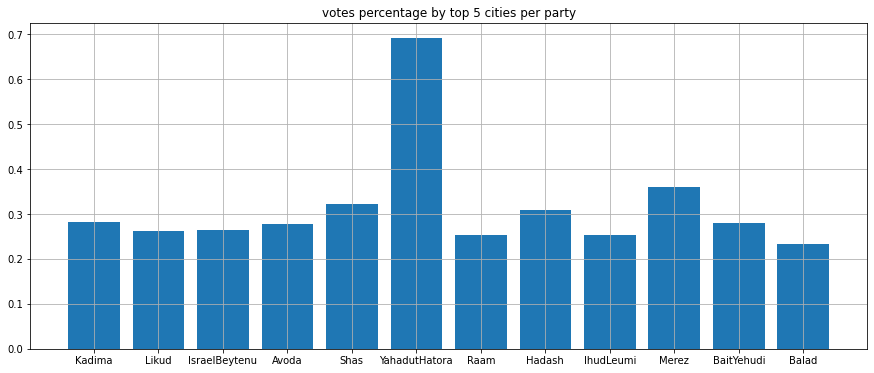

In [30]:
num_cities = 5
votes_perc_vec = []

for i,city in enumerate(parties):
    votes_perc_vec.append(num_of_cities_for_percentage(city, num_cities))

fig=plt.figure(figsize=(15,6))
plt.title(f'votes percentage by top {num_cities} cities per party')
plt.grid()
plt.bar(parties, votes_perc_vec);

***

It's clear fromt the graphs above that the geographical distribution of Yahadut Hatorah's voters is skewed - most of its votes come from very few cities: more than 50% of voters come just from Jerusalem and Bnei Brak and about 70% come from 5 cities, more than double compared to the rest of the parties). This stands in high contrast to the other parties which are much more geographically spread.
 
***

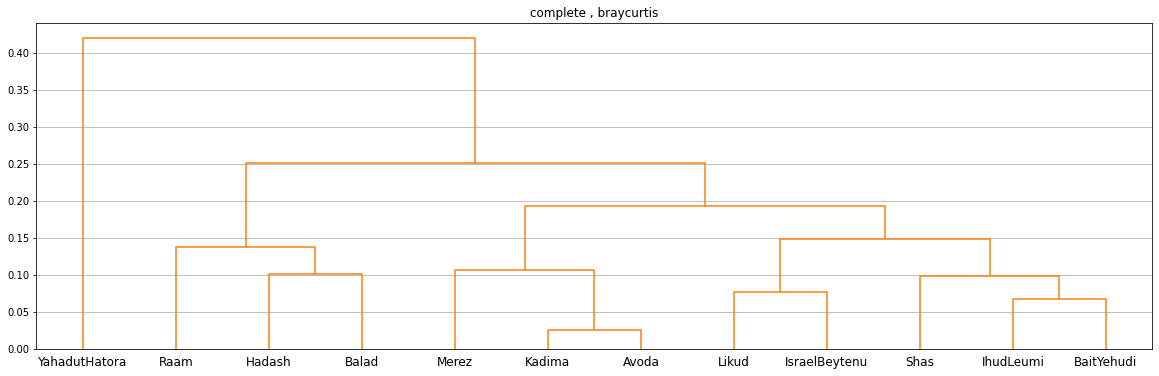

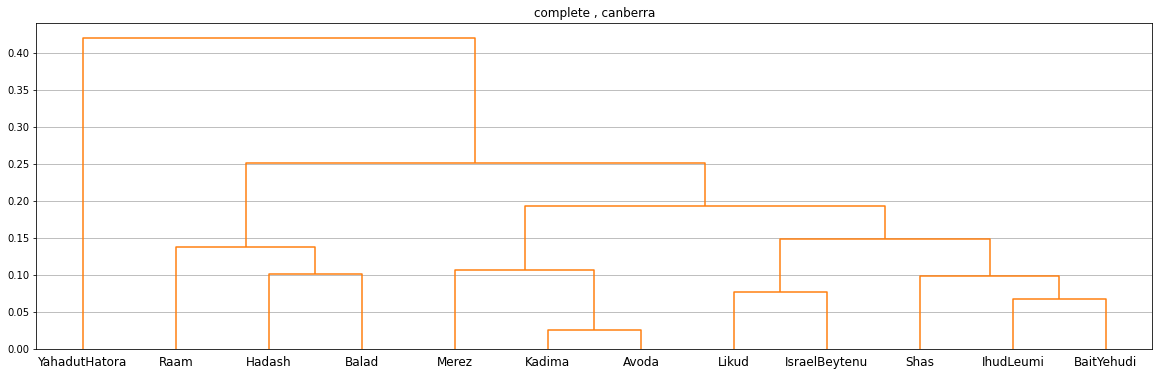

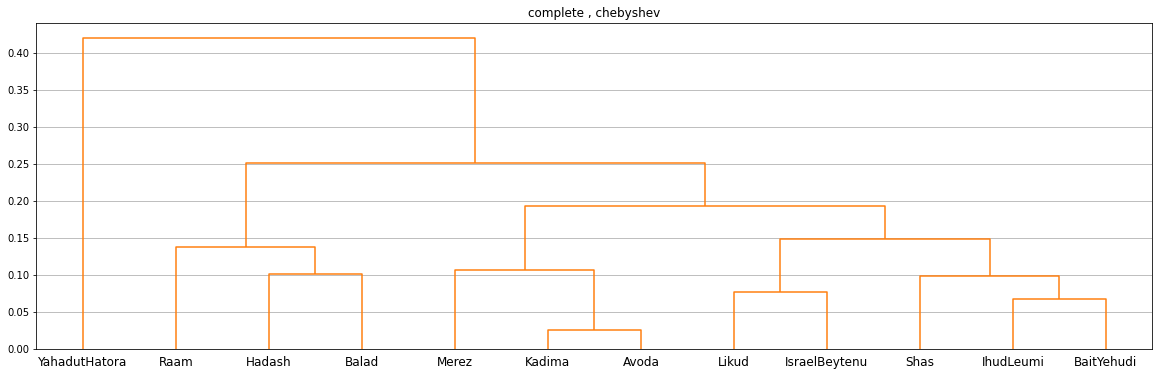

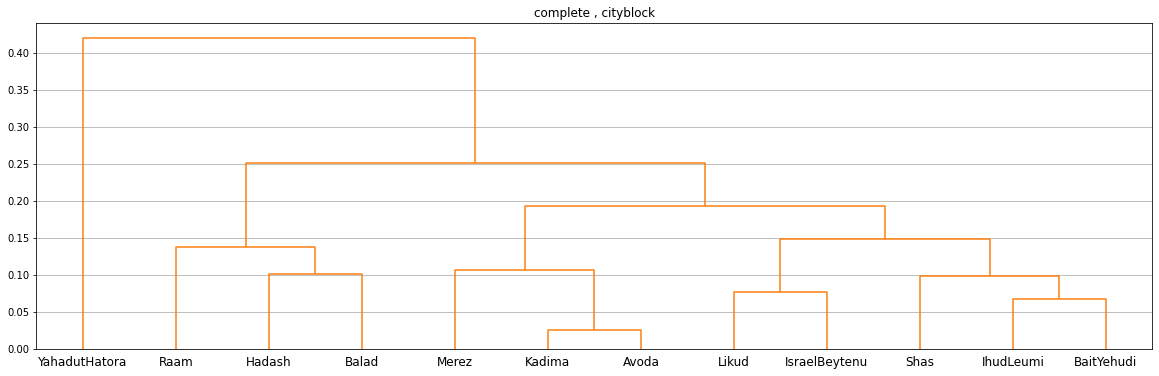

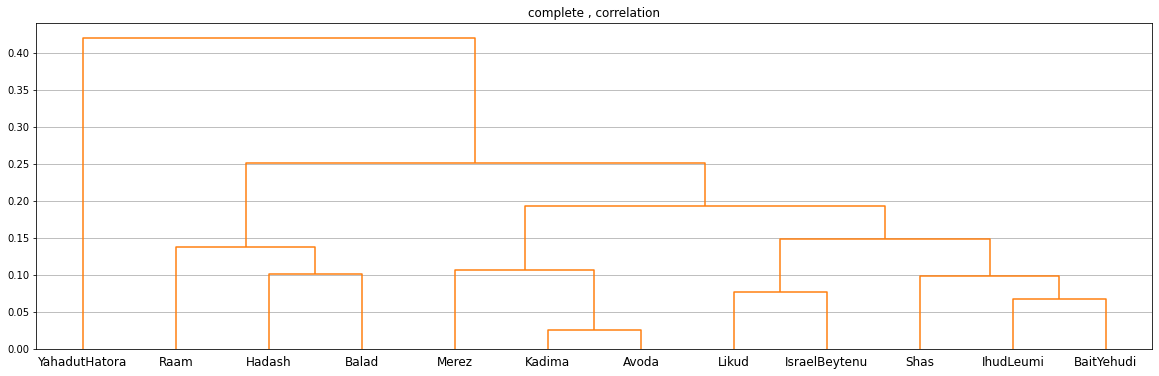

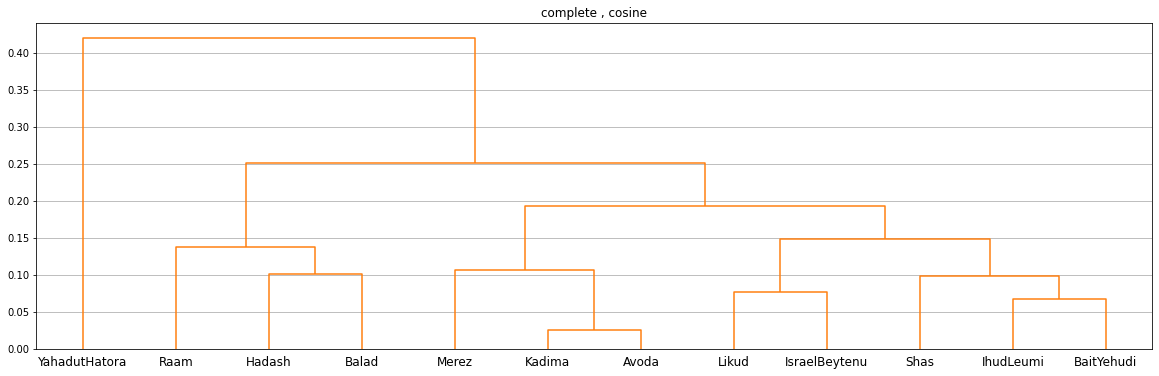

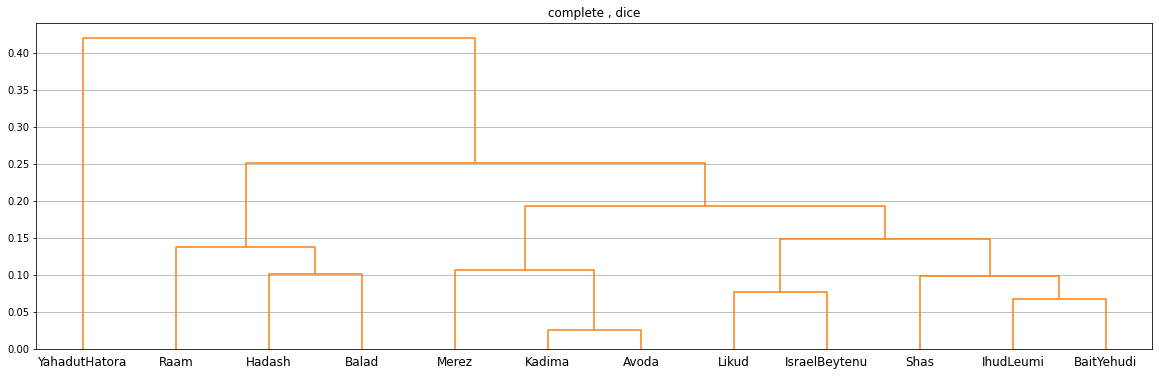

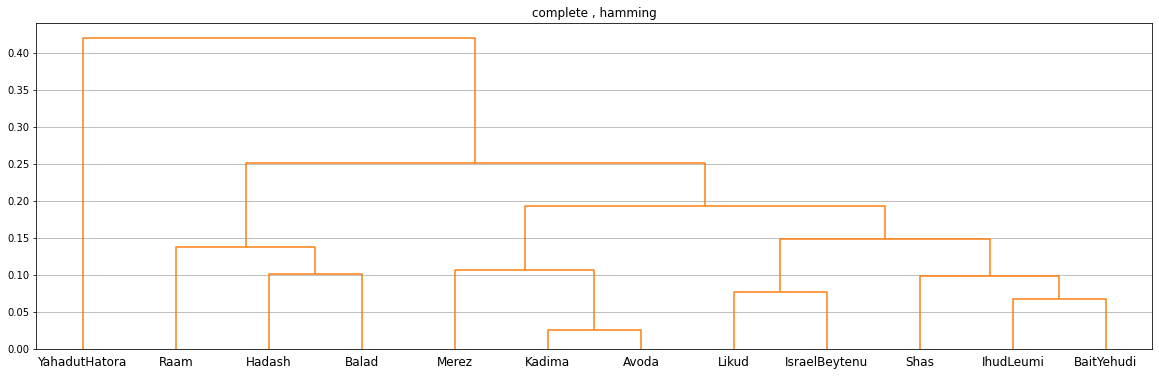

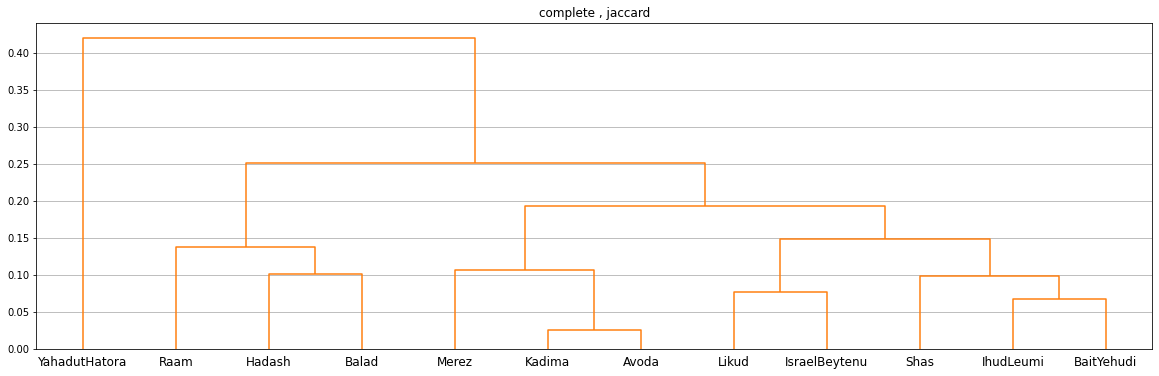

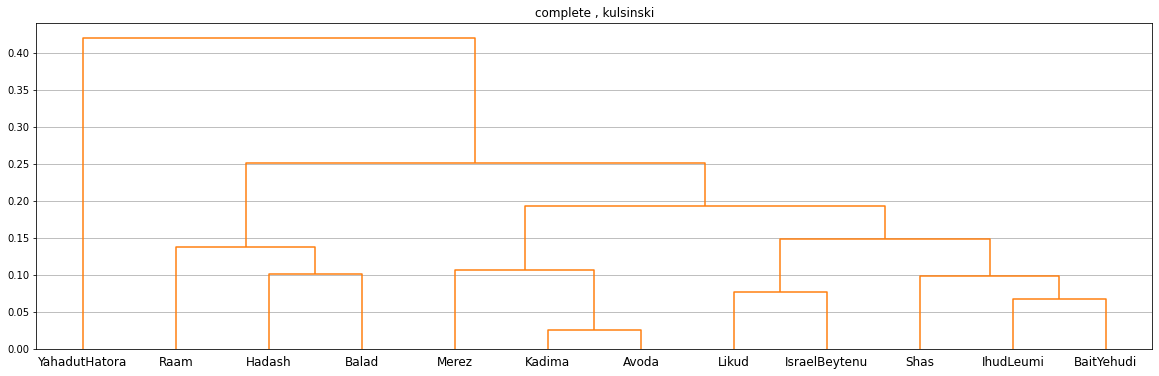

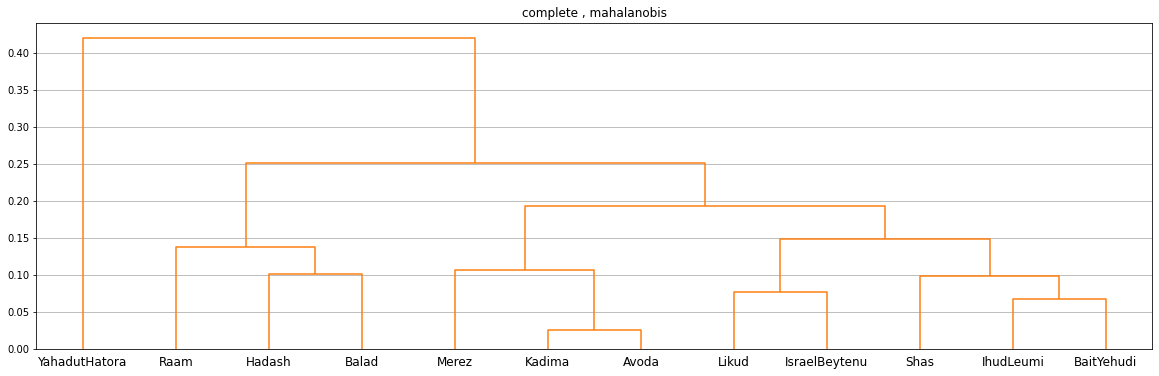

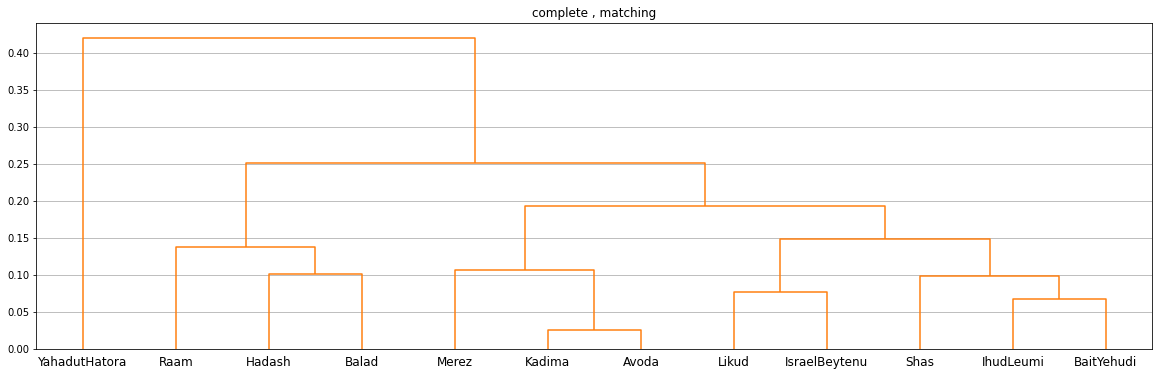

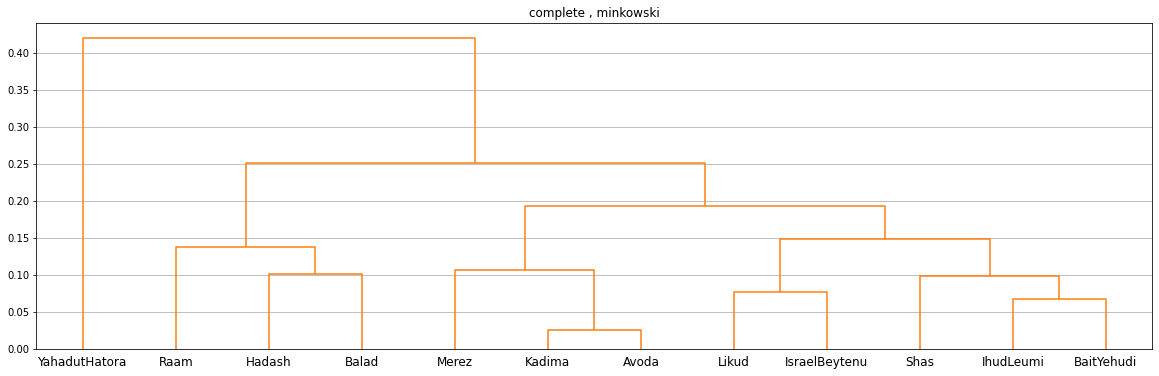

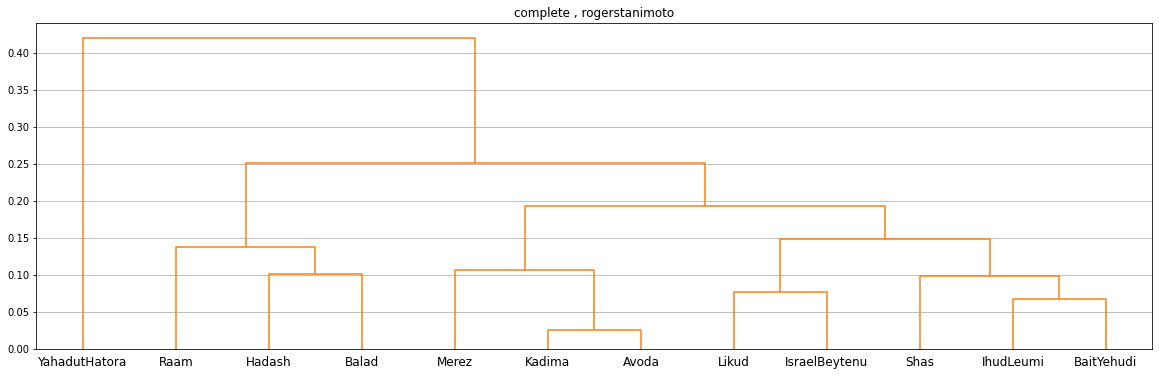

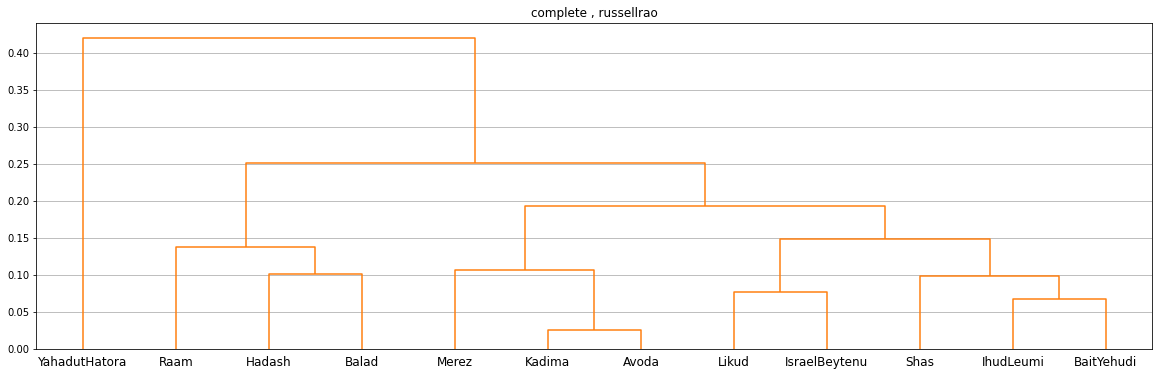

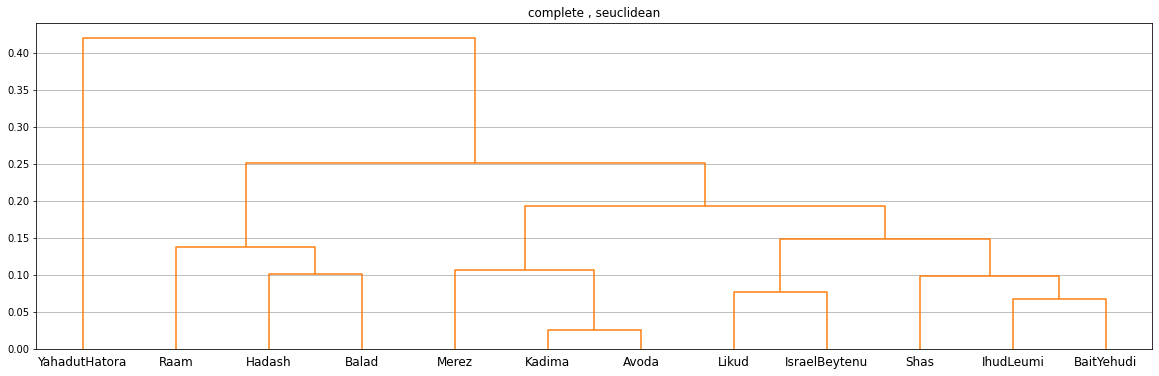

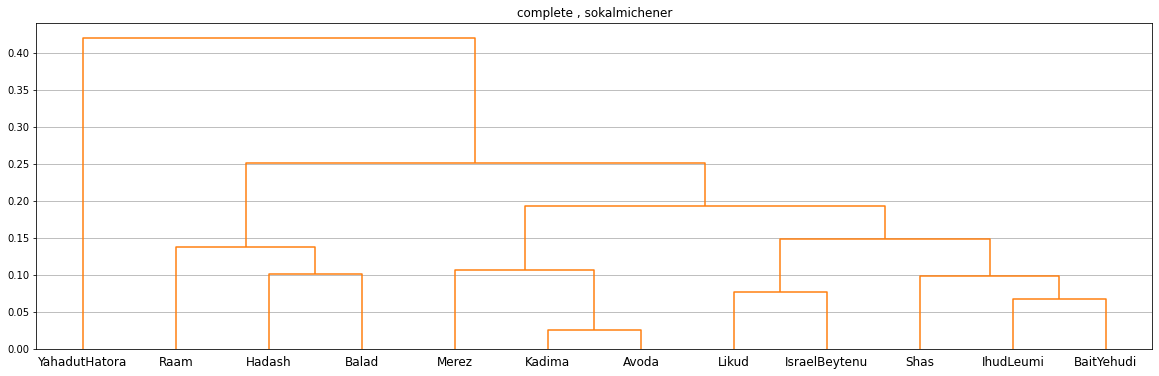

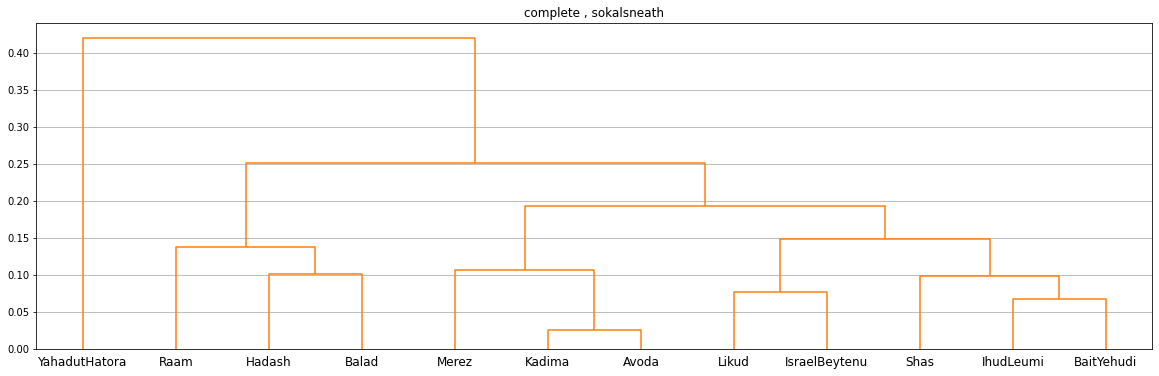

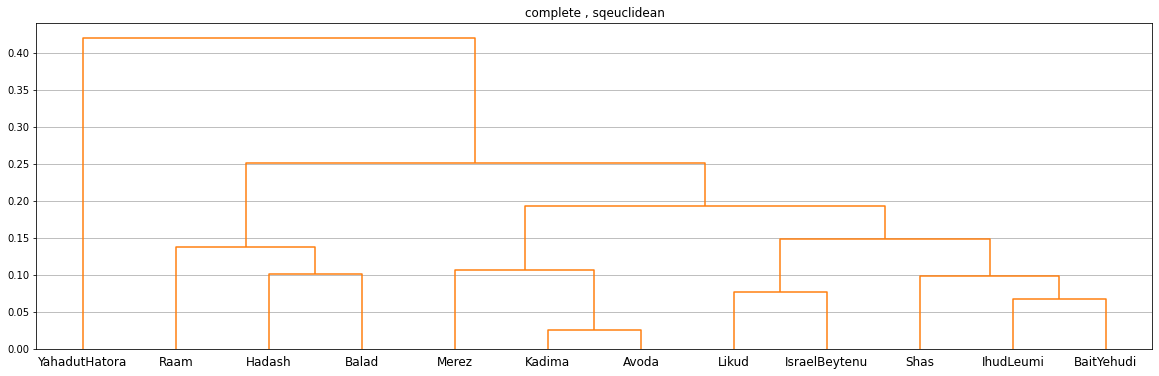

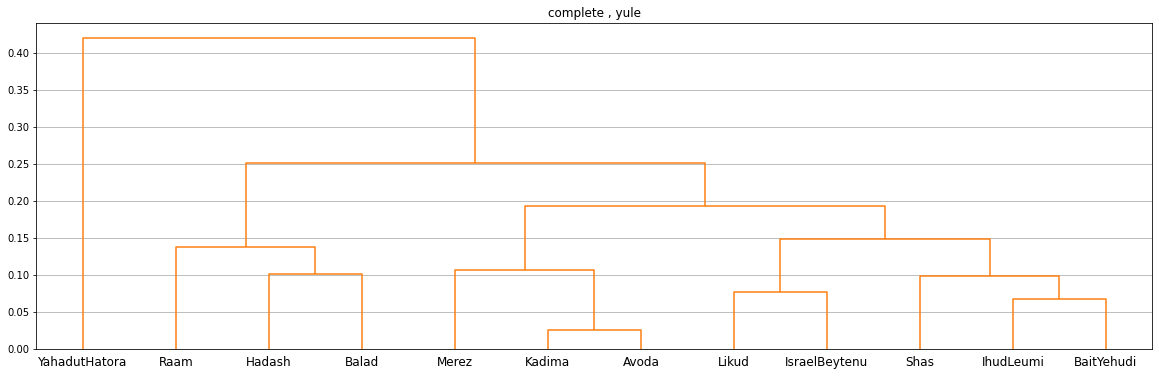

In [31]:
# let's try to use a different distance function
dist_metrics = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']

for dist in dist_metrics:
    cluster_and_plot_dendrogram_custom(x_parties_clean, 0.2, method = 'complete', metric = dist ) # ward also works well here


***

Doesn't seem like changing the distance matrix made any difference.

__Summary:__

   1. We reduced the number of parties according to a threshold of 1% of votes in order to remove 'noise' parties which are not actually part of the political map. (Note: the formal threshold to enter the Knesset was 3.25%, but we chose to remove data that seemed insignificant with regards to the entire dataset.)
   2. We normalized the data by dividing the matrix by the sum of each row (total votes per party). As each row is a party, the ratio we got represents the relative geographical distribution of the votes for that party i.e. from where the party got most of it's power, it's votes.
   3. Clustering results after cleaning the data seem to cluster most of the data correctly. Yahadut Hatora was the outlier and is clustered with all the other parties last - seems like the voting patterns for it are different than other parties. An intereseting fact, based on domain knowledge: YahadutHatorah was not idealogocally left or right by nature at that time.
    
***

## Part 2 - DBSCAN


In this part of the exercise, we will experiment with the DBSCAN algorithm on a synthetic set of data

In [32]:
# auxilary plotting functions
def plot(X,y=None):# plot
    plt.scatter(X[:, 0], X[:, 1],c=y)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.show()
    
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import preprocessing

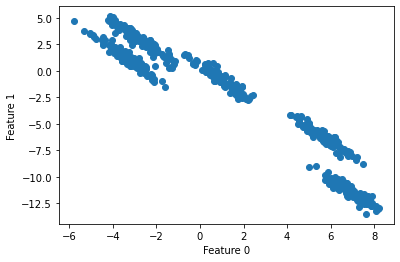

In [33]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=500, centers = 5)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

plot(X)

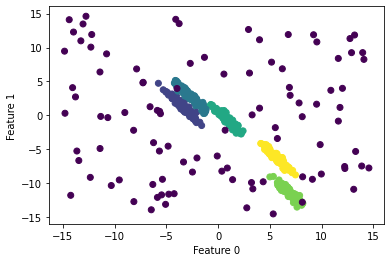

In [34]:
# Adding Noise to data
outliers = 30 * (np.random.RandomState(42).rand(100, 2) ) - 15.0
X = pd.DataFrame(np.concatenate([X, outliers]))
y = pd.DataFrame(np.concatenate([y, [-1]*len(outliers)]))
plot(X.values,y)

### K-Means attempt
Lets see how those outliers and non-spherical shapes affects K-Means clustreing

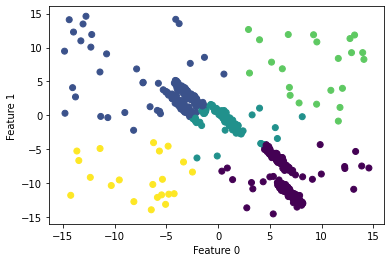

In [35]:
# cluster the data into five clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
kmeans_clusters = kmeans.predict(X)

plot(X.values,kmeans_clusters)

Not surprisingly, K-Means failed to cluster properly the data above 

As we saw in the lecture, DBSCAN can overcome those issues. Yet we still need to determine the parametrs...




# Estimateing $\varepsilon$

## Challenge 2.1

Your co-worker suggested a way to select $\epsilon$ of dbscan.
He wants to go over different eps values and find the one that maximizes the adjusted rand index value. For that, you paid some amount of money and had some guys labled 50 points for you. The indices of the labeled samples you are allowed to use are in the next cell.
Implement the algorithm and find the best $\epsilon$ using this method.
1. Create an array of possible $\epsilon$ values.
2. Iterate over the different values and find the best $\epsilon$ value. What is it?
3. Visualize the results of the best one.



In [36]:
np.random.seed(0)
labeled_samples = np.random.choice(601,50,replace=False)
y_50_samples = y.iloc[labeled_samples,0]
y_50_samples.head()

596   -1
52     1
190    1
165    4
344    4
Name: 0, dtype: int64

In [37]:
def run_dbscan_test_ari(X, eps, minPts, labeled_samples, y_50_samples, prints):
    
    if prints:
        print('eps =  %0.3f ' % eps, end = '; ')
    
    # cluster the data 
    dbscan = DBSCAN(eps=eps, min_samples = minPts)
    dbscan_predictions = dbscan.fit_predict(X)
    
    ari = adjusted_rand_score(y_50_samples, dbscan_predictions[labeled_samples])
    if prints:
        print(' %d clusters' % len(set(dbscan_predictions)- set([-1])), end = '; ')
        print("ARI = %0.3f" % (ari))

    return ari, dbscan_predictions

eps =  0.100 ;  0 clusters; ARI = 0.000
eps =  0.200 ;  0 clusters; ARI = 0.000
eps =  0.300 ;  0 clusters; ARI = 0.000
eps =  0.400 ;  0 clusters; ARI = 0.000
eps =  0.500 ;  0 clusters; ARI = 0.000
eps =  0.600 ;  0 clusters; ARI = 0.000
eps =  0.700 ;  0 clusters; ARI = 0.000
eps =  0.800 ;  1 clusters; ARI = 0.038
eps =  0.900 ;  5 clusters; ARI = 0.396
eps =  1.000 ;  4 clusters; ARI = 0.553
eps =  1.100 ;  4 clusters; ARI = 0.719
eps =  1.200 ;  4 clusters; ARI = 0.763
eps =  1.300 ;  4 clusters; ARI = 0.780
eps =  1.400 ;  4 clusters; ARI = 0.780
eps =  1.500 ;  3 clusters; ARI = 0.538
eps =  1.600 ;  3 clusters; ARI = 0.538
eps =  1.700 ;  3 clusters; ARI = 0.538
eps =  1.800 ;  3 clusters; ARI = 0.548
eps =  1.900 ;  3 clusters; ARI = 0.548
eps =  2.000 ;  2 clusters; ARI = 0.442
eps =  2.100 ;  2 clusters; ARI = 0.442
eps =  2.200 ;  2 clusters; ARI = 0.442
eps =  2.300 ;  2 clusters; ARI = 0.442
eps =  2.400 ;  2 clusters; ARI = 0.442
eps =  2.500 ;  1 clusters; ARI = 0.110


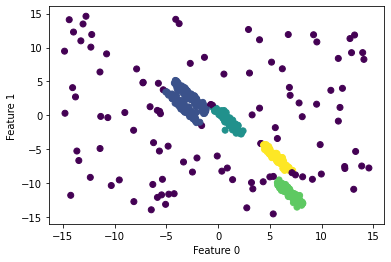

(1.3000000000000003, 0.7801802170145395, 4)

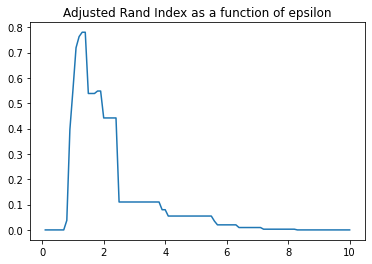

In [38]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score

MIN_PTS = 50

def find_Best_epsilon(minPts, X, labeled_samples, y_50_samples, prints = True):
    # minPts are given and are not required to be estimated.
    # Yet, in the cells after completing the task feel free to play with it and get better result if you can!
    
    min_eps = 2
    max_ari = 0
    best_dbscan_clusters = []
    ari_vec = []

    epsilons = np.arange(0.1, 10.1, 0.1)

    for eps in epsilons:

        ari, dbscan_predictions = run_dbscan_test_ari(X, eps, minPts, labeled_samples, y_50_samples, prints);
        ari_vec.append(ari)
        if ari > max_ari:
            min_eps = eps
            max_ari = ari
            best_dbscan_clusters = dbscan_predictions

    if prints:

        print('\nbest epsilon =  %0.3f' % min_eps)
        print('ARI =  %0.3f '% max_ari)
        print('num of classified noise instances:',len([x for x in best_dbscan_clusters if x == -1]))
        print('num of classified regular instances:',len([x for x in best_dbscan_clusters if x != -1]))
        print('num of clusters = ', len(set(best_dbscan_clusters)- set([-1])))
        plot(X.values,best_dbscan_clusters)
    
        plt.plot(epsilons, ari_vec)
        plt.title('Adjusted Rand Index as a function of epsilon');

    clusters_count =  len(set(best_dbscan_clusters)- set([-1]))

    return min_eps, max_ari, clusters_count
    
find_Best_epsilon(MIN_PTS , X, labeled_samples, y_50_samples)

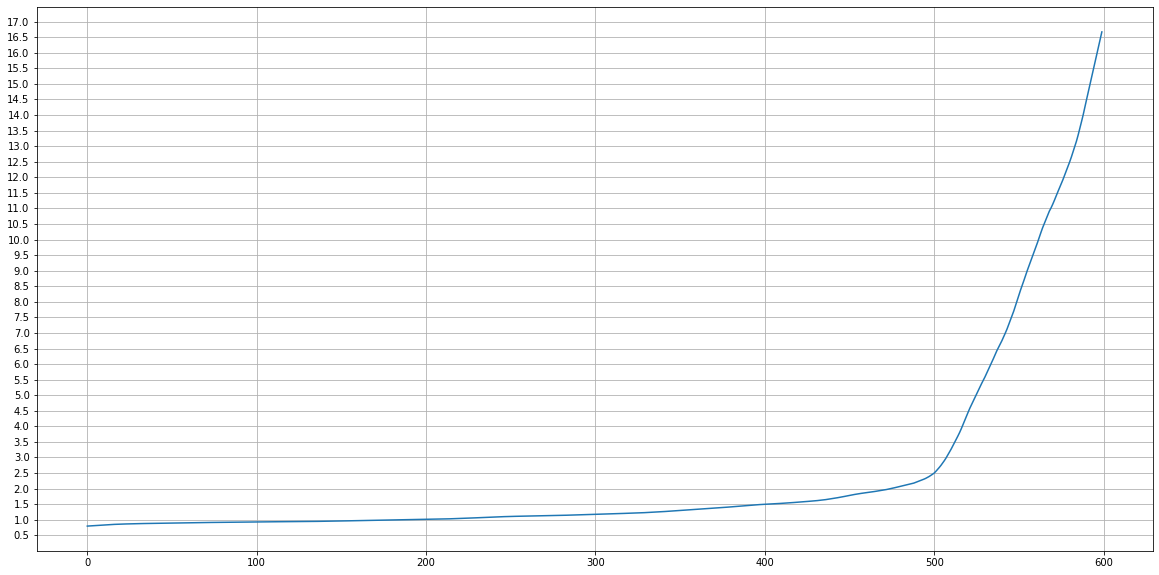

In [39]:
# let's try to find optimal epsilon using NearestNeighbors and the elbow method:

from sklearn.neighbors import NearestNeighbors
from scipy.signal import savgol_filter


neigh = NearestNeighbors(n_neighbors=MIN_PTS)
nbrs = neigh.fit(X)
distances, _ = nbrs.kneighbors(X)
distances = distances[:,-1]
distances = np.sort(distances, axis=0)
distances = savgol_filter(distances, 21, 1) # Smooth the data
fig = plt.figure(figsize=(20, 10))
plt.grid()
plt.yticks(np.arange(0, 20, 0.5))
plt.plot(distances);



***

Let's try to get a better results by changing minPts:

***

In [40]:
# Generally, MinPts should be greater than or equal to the dimensionality of the data set
# For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996).

# let's iterate over different combinations of minPts and epsilon

minPts_arr = np.arange(2,50)
best_eps = None
best_minPts = None
best_ari = 0
number_of_clusters = X.shape[0]

prints = False
for pt in minPts_arr:
    if prints:
        print('\nminPts = ', pt)
    else:
        print('.', end = '')
    min_eps, max_ari, clusters = find_Best_epsilon(pt , X, labeled_samples, y_50_samples,  prints)
    if max_ari >= best_ari and clusters<=number_of_clusters: # so we don't overfit by creating more clusters
        best_ari = max_ari
        best_eps = min_eps
        best_minPts = pt
        number_of_clusters = clusters
    
print('\n\nbest MinPts = ',best_minPts )
print('best_eps = ',best_eps )
print('ARI = %.3f' % best_ari )
print('number of clusters = ', number_of_clusters - 1) # removeo noise cluster
    

................................................

best MinPts =  7
best_eps =  0.5
ARI = 0.952
number of clusters =  4


eps =  0.500 ;  5 clusters; ARI = 0.952
num of classified noise instances: 108
num of classified regular instances: 492
5 clusters


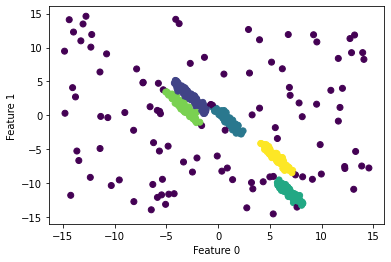

In [41]:
ari, dbscan_predictions = run_dbscan_test_ari(X, best_eps, best_minPts, labeled_samples, y_50_samples, True)

print('num of classified noise instances:',len([x for x in dbscan_predictions if x == -1]))
print('num of classified regular instances:',len([x for x in dbscan_predictions if x != -1]))
print('%d clusters' % len(set(dbscan_predictions)- set([-1])))

plot(X.values,dbscan_predictions)


***

This seems like good results 
***

How many values of $\epsilon$ did you iterate? can you find a way to narrow down the range of the search?

Answers are expected in a textual form

***
We iterated over 100 values. We can narrow it down by using the 'elbow' of the  K-distance graph: 

In this method we apply the K-Nearest Neighbors algorithm on the data with where k = MinPts and then take the distances to the k'th neighbor, sort them and present them in a graph (X axis has all the points, sorted by their distance to the k'th point). This simulates the furthest distances within neighborhoods of DBSCAN. At each point in the graph, the y value represents the epsilon that will include the k'th point for all points up to that point and all the other points are considered noise. The y values represents the separation between clustered points and noise (all points that are above that y values will be greater than espilon, therefore, outside of the neighborhood - so will be considered noise).
As we go right on the graph - we classify more points in clusters and less points as noise, but when the graph curves - we will get more noise, so we are looking for the 'elbow' - where epsilon is big enough for most of the points to be clustered but not big enough to include a lot of noise.

***

## Challenge 2.2


Support yout findings by plotting the Purity score.
Implement the purity score and print the score for the best epsilon you have found.
Print the results for:
1. The small labeled set you were given
2. The rest of the data (not including the set from 1)
3. The whole data together

Are we overfitting?

In [42]:
from sklearn.metrics.cluster import contingency_matrix

def calculate_purity(y_true, y_pred):
    cont_matrix = contingency_matrix(y_pred, y_true)
    max_per_row = np.max(cont_matrix, axis = 0)
    purity = np.sum(max_per_row) / np.sum(cont_matrix)

    return purity

y_pred_small = dbscan_predictions[labeled_samples]
y_true_small = y_50_samples.values

labeled_samples_other = [x for x in range(600) if x not in labeled_samples]
y_pred_rest = dbscan_predictions[labeled_samples_other]
y_true_rest = y.iloc[labeled_samples_other].values

print(f'purity scrore (50 samples) = {calculate_purity(y_true_small, y_pred_small):.3f}')
print(f'purity scrore (550 samples)= {calculate_purity(y_true_rest, y_pred_rest):.3f}')
print(f'purity scrore (entire dataset) = {calculate_purity(y.values, dbscan_predictions):.3f}')


purity scrore (50 samples) = 0.980
purity scrore (550 samples)= 0.980
purity scrore (entire dataset) = 0.980


***

It doesn't seem like we are overfitting, as we the purity is just as high on the entire dataset and on the 550 samples as on out test data (50 samples) we used to tune our parameters. 

***




# Good Luck and Enjoy Learning Machine Learning!

